# CPLEX Basics on Linear Programming

## Introduction
* Widely used
* Used to represent many practical problems
* Elements
    * A linear objective function
    * Linear (in)equalities
    

## The standard Form
\begin{align}
\text{minimize}\  & f(x) \\
\text{subject to } & \\
& a_1x &&\geq b_1 \\
& a_2x + c && \geq b_2 \\
& x &&\geq 0
\end{align}



# CPLEX Basics: Linear Model
## Mathematical Model
\begin{align}
\text{minimize}\  & 5x + 4y \\
\text{subject to } & \\
& \ \ x+\ \ y &&\geq \ \ 8 \\
& 2x + \ \ y &&\geq 10 \\
& \ \ x + 4y &&\geq 11 \\
& \ \ x &&\geq \ \ 0 \\
& \ \ \ \ \ \ \ \ \ \ \ y &&\geq \ \ 0
\end{align}

## Graphical representation of the problem


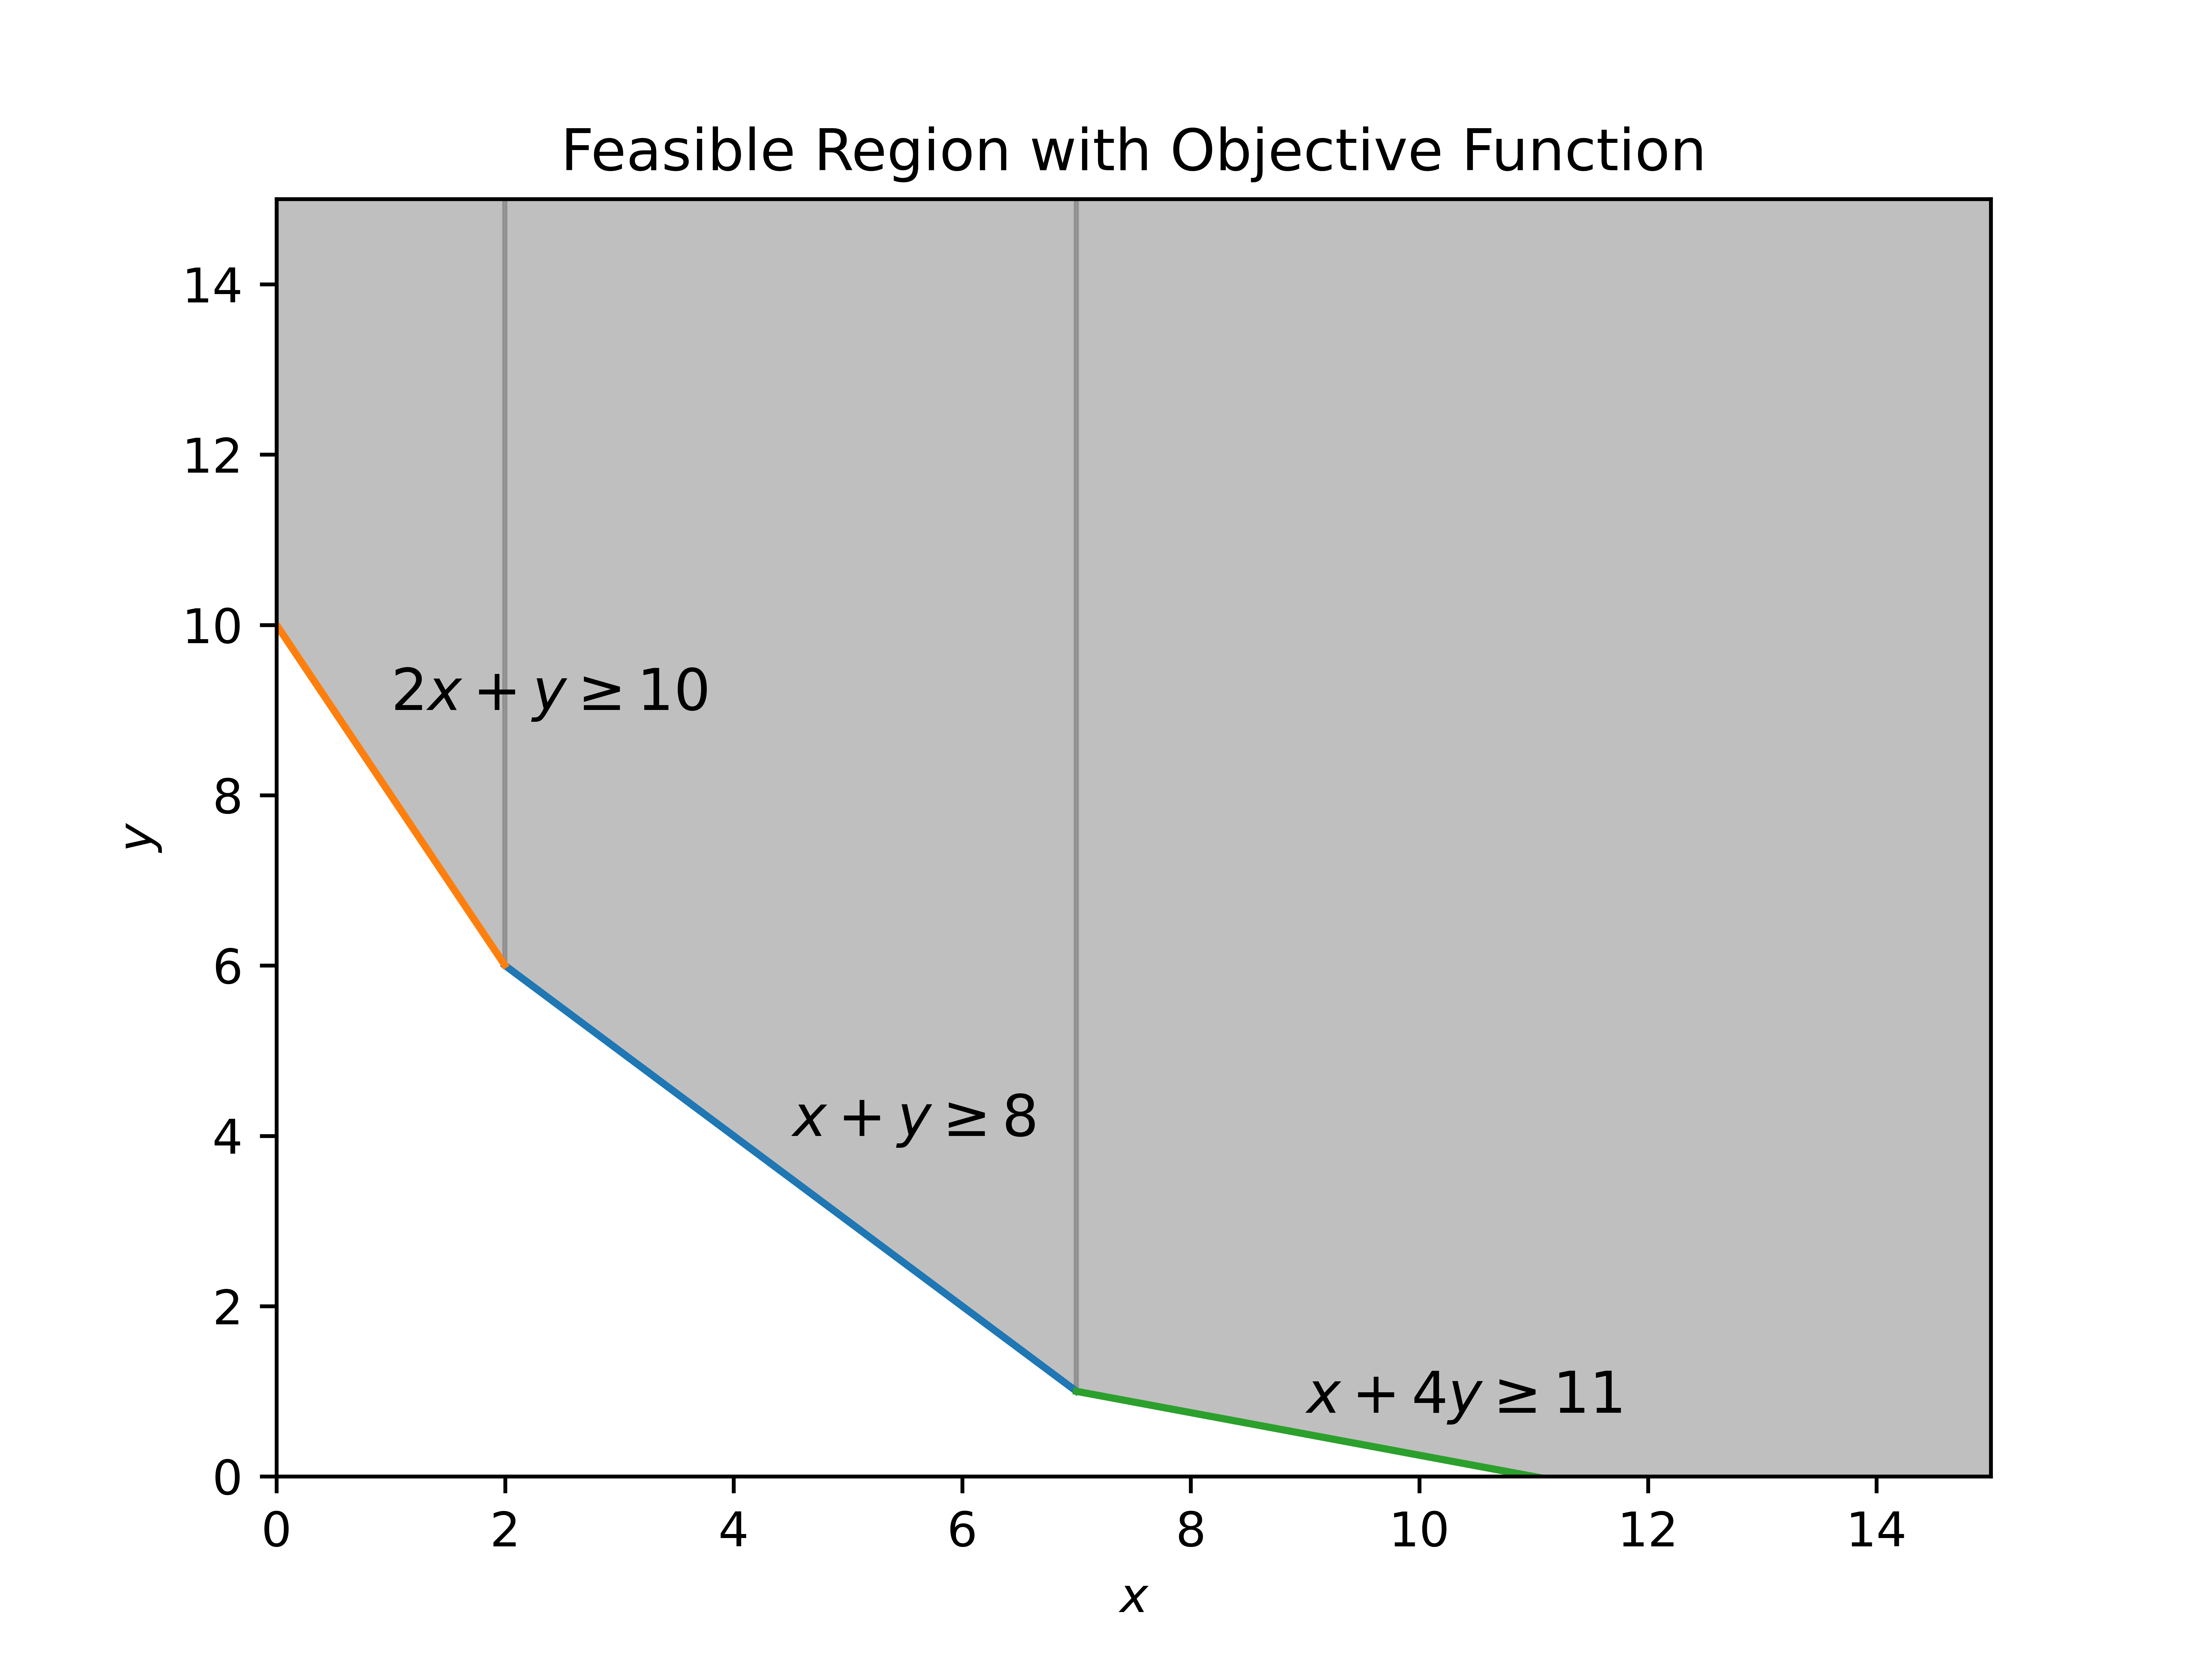

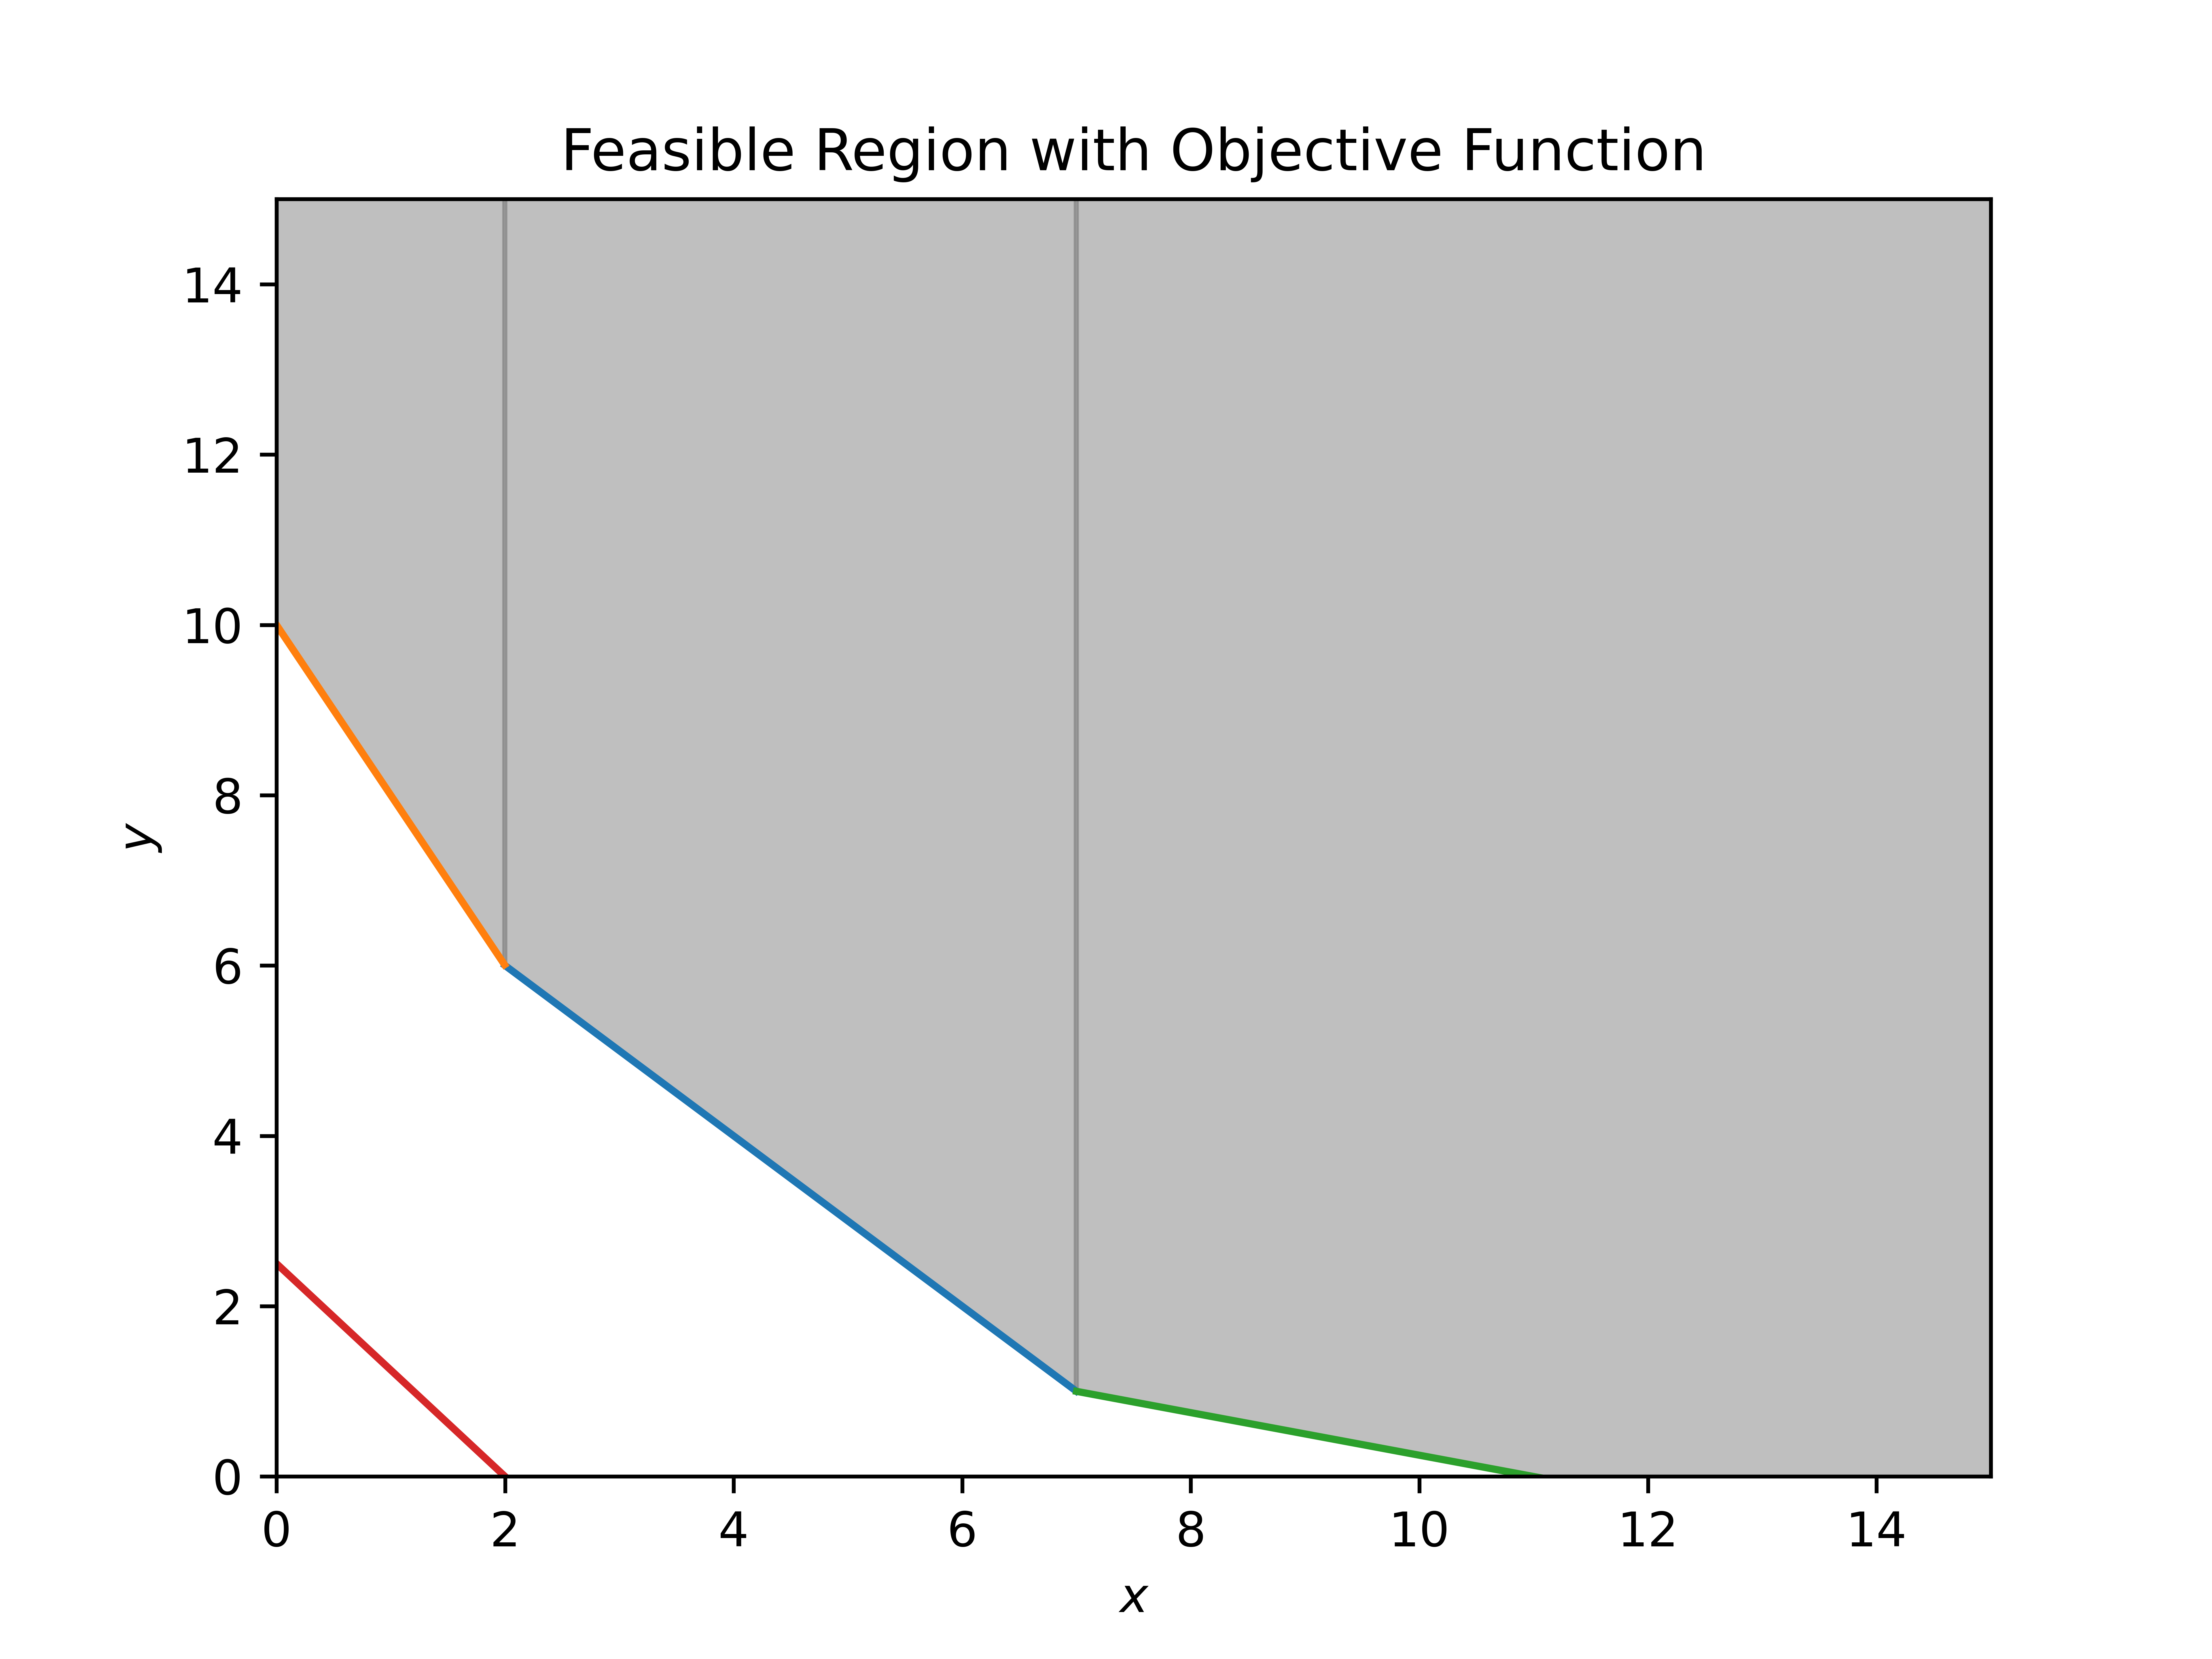

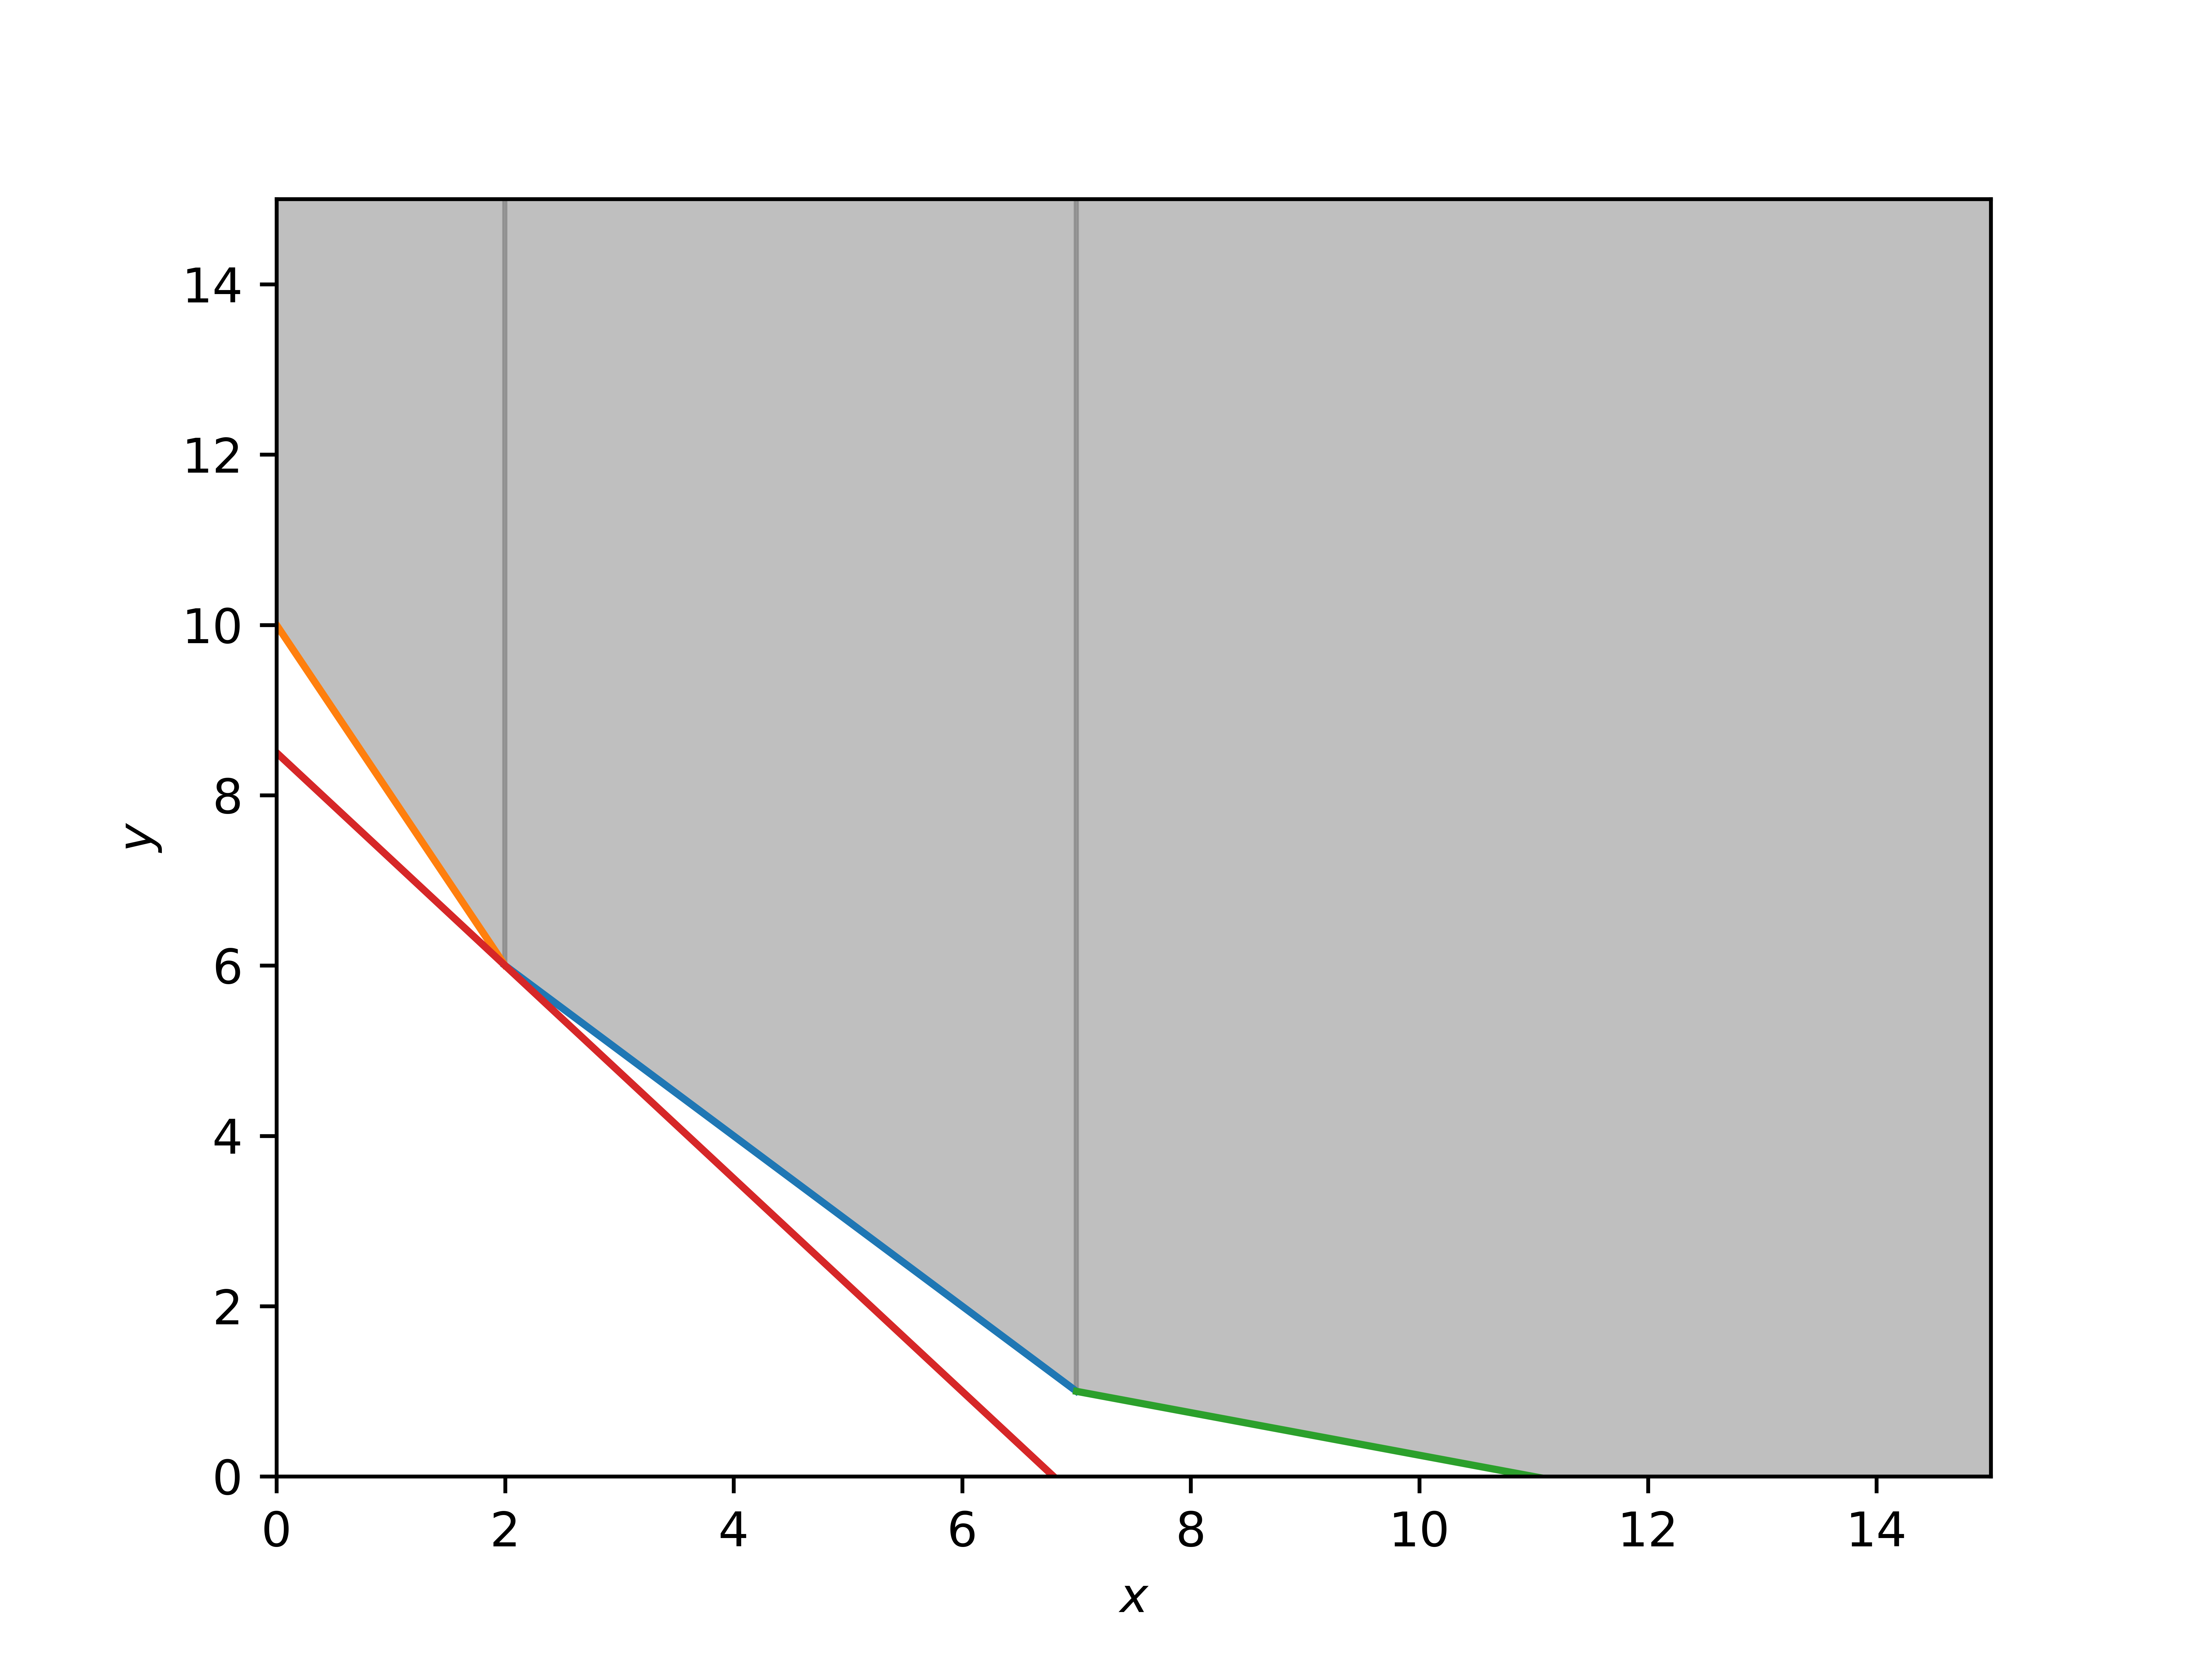

In [24]:
from IPython.display import Image
from IPython.display import display
graphs = ['fr', 'fr_o1', 'fr_o3']
for g in graphs:
    display(Image(filename = g+'.png'))

# Code in Python using docplex
## Step 1: Importing docplex package

In [26]:
from docplex.mp.model import Model

## Step 2: Create an optimization model
Model constructor. Initially, no variables or constraints.
``` python
Model(name = '')
```

In [27]:
opt_mod = Model(name = "Linear Program")

## Step 3: Add decision variables
Add a continuous decision variable to a model.
``` python

Model.continuous_var(lb=None,   #(optional) lower bound, default is 0.
                     ub=None,   #(optional) upper bound, default is infinity.
                     name=None) #(optional) name
             
```

In [28]:
x = opt_mod.continuous_var(name = 'x', lb = 0)
y = opt_mod.continuous_var(name = 'y', lb = 0)

## Step 4: Add the constraints
Add a constraint to a model. 
```python
Model.add_constraint(ct,            # <exp1> <operator> <exp2> 
                     ctname = None) # name of the constraint
```

In [29]:
c1 = opt_mod.add_constraint(  x +   y >=  8, ctname = 'c1')
c2 = opt_mod.add_constraint(2*x +   y >= 10, ctname = 'c2')
c3 = opt_mod.add_constraint(  x + 4*y >= 11, ctname = 'c3')

## Step 5: Define the objective function
Set the model objective equal to a expression
``` python
Model.set_objective(sense, # “max” for maximization, “min” for minimization 
                    expr)  # New objective expression

```

In [30]:
obj_fn = 5*x + 4*y
opt_mod.set_objective('min', obj_fn)

opt_mod.print_information()

Model: Linear Program
 - number of variables: 2
   - binary=0, integer=0, continuous=2
 - number of constraints: 3
   - linear=3
 - parameters: defaults
 - objective: minimize
 - problem type is: LP


## Step 6: Solve the model

``` python
Model.solve() # solve the model
```

In [31]:
opt_mod.solve() # solve the model

docplex.mp.solution.SolveSolution(obj=34,values={x:2,y:6})

## Step 7: Output the result

In [32]:
opt_mod.print_solution()

objective: 34.000
  x=2.000
  y=6.000
